In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
import seaborn as sns

%matplotlib inline

In [2]:
train_labels = pd.read_csv('documents/datasets/train_labels.csv')
train_values = pd.read_csv('documents/datasets/train_values.csv')
submission = pd.read_csv('documents/datasets/test_values.csv')
test_values = pd.read_csv('documents/datasets/submission_format.csv')

In [3]:
print("Shape of train labels data: ", train_labels.shape)
print("Shape of train values data: ", train_values.shape)
print("Shape of test values data: ", test_values.shape)
print("Shape of submission: ", submission.shape)

Shape of train labels data:  (2546, 2)
Shape of train values data:  (2546, 48)
Shape of test values data:  (2420, 2)
Shape of submission:  (2420, 48)


In [4]:
train = pd.merge(train_labels, train_values)

print(train.shape)

(2546, 49)


In [5]:
train['county_code'].describe()

count        2546
unique       1296
top       d1993c9
freq            2
Name: county_code, dtype: object

In [6]:
train.dtypes

row_id                                          int64
evictions                                       int64
county_code                                    object
year                                           object
state                                          object
population                                    float64
renter_occupied_households                    float64
pct_renter_occupied                           float64
median_gross_rent                             float64
median_household_income                       float64
median_property_value                         float64
rent_burden                                   float64
pct_white                                     float64
pct_af_am                                     float64
pct_hispanic                                  float64
pct_am_ind                                    float64
pct_asian                                     float64
pct_nh_pi                                     float64
pct_multiple                

C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


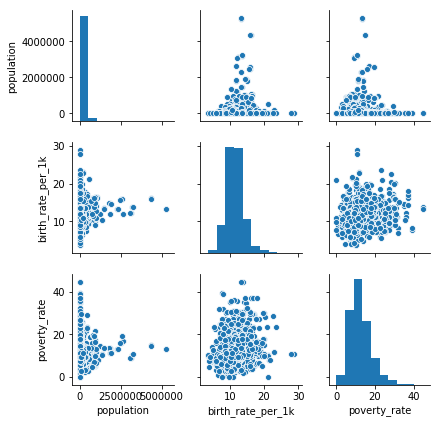

In [7]:
%matplotlib inline

import seaborn as sns
num_cols = ['population', 'birth_rate_per_1k', 'poverty_rate', 'rucc']
sns.pairplot(train[num_cols], size=2)

C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


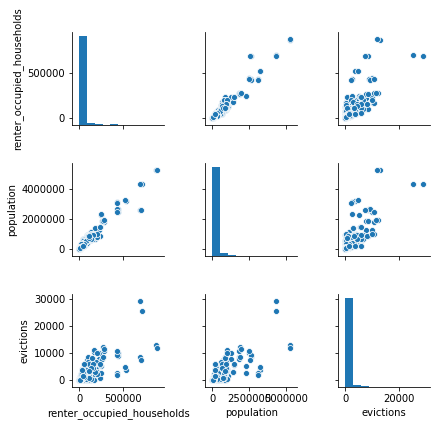

In [8]:
%matplotlib inline

import seaborn as sns
num_cols = ['renter_occupied_households', 'population', 'evictions']
sns.pairplot(train[num_cols], size=2)

In [9]:
train.describe()

,row_id,evictions,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
count,2546.000000,2546.000000,2.546000e+03,2546.000000,2546.00000,2546.000000,2544.000000,2544.000000,2546.000000,2546.000000,...,2371.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000
mean,1272.500000,378.048311,1.062459e+05,15008.009034,28.14739,688.838178,46050.601415,129609.579009,28.520561,0.776272,...,2587.696752,0.499126,0.226179,0.171583,0.147891,0.353198,0.300911,0.198000,11.481923,10.407134
std,735.111216,1405.276610,3.228520e+05,53333.684235,7.94014,183.722492,11584.627249,76236.606321,4.453165,0.201149,...,2216.147338,0.024247,0.032725,0.041928,0.068077,0.070167,0.051811,0.086415,2.565979,2.720135
min,0.000000,0.000000,1.160000e+02,14.000000,7.30500,336.000000,19328.000000,32287.000000,9.986000,0.050935,...,189.000000,0.285000,0.088000,0.063000,0.016032,0.127127,0.137000,0.018868,3.612183,0.000000
25%,636.250000,4.000000,1.029350e+04,1052.000000,22.88400,577.250000,38495.500000,85288.250000,26.047250,0.655224,...,1409.000000,0.495000,0.206000,0.144000,0.097000,0.308732,0.265734,0.138146,9.915292,8.558383
50%,1272.500000,29.000000,2.386300e+04,2580.500000,26.86600,642.000000,44480.000000,108844.000000,28.780000,0.855478,...,1980.000000,0.504000,0.225000,0.168000,0.130869,0.356574,0.301301,0.176677,11.306037,10.478088
75%,1908.750000,160.750000,6.796875e+04,8098.750000,32.09275,750.000000,51526.000000,151696.250000,31.160500,0.935331,...,2864.500000,0.511000,0.243750,0.194750,0.194410,0.401405,0.336000,0.232908,12.836254,12.159568
max,2545.000000,29251.000000,5.279852e+06,882101.000000,70.61000,1728.000000,123452.000000,904937.000000,49.535000,0.995114,...,23399.000000,0.572000,0.359000,0.345000,0.465932,0.550349,0.448692,0.584080,28.922868,27.397260


In [10]:
train['renter_occupied_households'].describe()

count      2546.000000
mean      15008.009034
std       53333.684235
min          14.000000
25%        1052.000000
50%        2580.500000
75%        8098.750000
max      882101.000000
Name: renter_occupied_households, dtype: float64

In [11]:
# 'population', 'pct_unemployment', 'birth_rate_per_1k', 'death_rate_per_1k'

In [12]:
train.isna().any()[lambda x: x]

median_household_income                   True
median_property_value                     True
pct_adult_smoking                         True
pct_low_birthweight                       True
pct_excessive_drinking                    True
air_pollution_particulate_matter_value    True
homicides_per_100k                        True
motor_vehicle_crash_deaths_per_100k       True
pop_per_dentist                           True
pop_per_primary_care_physician            True
dtype: bool

In [13]:
train.isnull().sum()

row_id                                           0
evictions                                        0
county_code                                      0
year                                             0
state                                            0
population                                       0
renter_occupied_households                       0
pct_renter_occupied                              0
median_gross_rent                                0
median_household_income                          2
median_property_value                            2
rent_burden                                      0
pct_white                                        0
pct_af_am                                        0
pct_hispanic                                     0
pct_am_ind                                       0
pct_asian                                        0
pct_nh_pi                                        0
pct_multiple                                     0
pct_other                      

In [14]:
train.drop('pct_adult_smoking', axis = 1, inplace = True)
train.drop('pct_low_birthweight', axis = 1, inplace = True)
train.drop('pct_excessive_drinking', axis = 1, inplace = True)
train.drop('homicides_per_100k', axis = 1, inplace = True)
train.drop('motor_vehicle_crash_deaths_per_100k', axis = 1, inplace = True)
train.drop('pop_per_dentist', axis = 1, inplace = True)
train.drop('pop_per_primary_care_physician', axis = 1, inplace = True)


In [15]:
train['median_property_value'].mean()

129609.57900943396

In [16]:
train['air_pollution_particulate_matter_value'].median()

12.01645651818475

In [17]:
train["median_property_value"].fillna(129610, inplace = True) 
train["air_pollution_particulate_matter_value"].fillna(12, inplace = True)

In [18]:
train.isna().any()[lambda x: x]

median_household_income    True
dtype: bool

In [19]:
train['median_household_income'].median()

44480.0

In [20]:
train['median_household_income'].mean()

46050.60141509434

In [21]:
train["median_household_income"].fillna(44480, inplace = True)

In [22]:
train.isna().any()[lambda x: x]

Series([], dtype: bool)

In [23]:
train['economic_typology'].value_counts()

Nonspecialized                        1024
Manufacturing-dependent                410
Farm-dependent                         360
Federal/State government-dependent     290
Recreation                             248
Mining-dependent                       214
Name: economic_typology, dtype: int64

In [24]:
Features = train['economic_typology']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

[4 4 5 ... 3 4 5]


In [25]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [26]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['urban_influence']

for col in categorical_columns:
    temp = encode_string(train[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])    

(2546, 18)
[[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [27]:
#eruit gehaald, voor testen: 

In [28]:
Features = np.concatenate([Features, np.array(train[['renter_occupied_households', 
                                                     'median_household_income', 'rent_burden', 'poverty_rate',
                                                     'pct_asian',
                                                     'population', 'pct_female', 
                                                     'birth_rate_per_1k']])], axis = 1)
Features[:2,:]
print(Features.shape)

(2546, 26)


In [29]:
# train['log_evictions'] = np.log(train['evictions'])

In [30]:
nr.seed(9988)
labels = np.array(train['evictions'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = .3)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [31]:
scaler = preprocessing.StandardScaler().fit(x_train[:,18:])
x_train[:,18:] = scaler.transform(x_train[:,18:])
x_test[:,18:] = scaler.transform(x_test[:,18:])
print(x_train.shape)
x_train[:5,:]

(1782, 26)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.24526116,  1.19627677,
        -1.66147795, -1.26033444, -0.40517036, -0.27208414,  0.29381902,
         0.10552067],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        , -0.18105498,  0.47823005,
         0.92964938, -0.5382758 , -0.07589561, -0.15732976,  0.62877975,
         0.07630971],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
       

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

nr.seed(444)
rf_clf = RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
scores = rf_clf.predict(x_test)

In [34]:
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = rf_clf.predict(x_test) 
print_metrics(y_test, y_score, 28)


Mean Square Error      = 138111.3115183246
Root Mean Square Error = 371.63330248825196
Mean Absolute Error    = 95.93193717277487
Median Absolute Error  = 10.0
R^2                    = 0.8991681949740526
Adjusted R^2           = 0.8954692021266334


In [35]:
Test_data = pd.read_csv('Documents/datasets/CAPSTONE/test_values.csv')
submission = pd.read_csv('Documents/datasets/CAPSTONE/submission_format.csv')

In [36]:
Test_data.drop('pct_adult_smoking', axis = 1, inplace = True)
Test_data.drop('pct_low_birthweight', axis = 1, inplace = True)
Test_data.drop('pct_excessive_drinking', axis = 1, inplace = True)
Test_data.drop('homicides_per_100k', axis = 1, inplace = True)
Test_data.drop('motor_vehicle_crash_deaths_per_100k', axis = 1, inplace = True)
Test_data.drop('pop_per_dentist', axis = 1, inplace = True)
Test_data.drop('pop_per_primary_care_physician', axis = 1, inplace = True)
print(Test_data.shape)


(2420, 41)


In [37]:
Test_data.isna().any()[lambda x: x]

median_gross_rent                         True
air_pollution_particulate_matter_value    True
dtype: bool

In [38]:
Test_data.drop('median_gross_rent', axis = 1, inplace = True)
Test_data.drop('air_pollution_particulate_matter_value', axis = 1, inplace = True)

In [39]:
Test_data.isna().any()[lambda x: x]

Series([], dtype: bool)

In [40]:
def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['urban_influence']

Features_test = encode_string(Test_data['economic_typology'])
print(Features_test.shape)
for col in categorical_columns:
    temp = encode_string(Test_data[col])
    Features_test = np.concatenate([Features_test, temp], axis = 1)

print(Features_test.shape)
print(Features_test[:2, :]) 

(2420, 6)
(2420, 18)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Renate\Anaconda3\ANACONDA\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='au

In [41]:
Features_test = np.concatenate([Features_test, np.array(Test_data[['renter_occupied_households', 
                                                     'median_household_income', 'rent_burden', 'poverty_rate',
                                                     'pct_asian',
                                                     'population', 'pct_female', 
                                                     'birth_rate_per_1k']])], axis = 1)
print(Features_test.shape)
print(Features_test[:2, :]) 

(2420, 26)
[[0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.73420000e+04 4.28280000e+04
  3.47380000e+01 1.45720000e+01 5.13487813e-03 1.71046000e+05
  5.09000000e-01 1.22384616e+01]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.37760000e+04 5.37120000e+04
  2.51080000e+01 6.75200000e+00 5.06306306e-02 1.14518000e+05
  4.97000000e-01 1.02136086e+01]]


In [42]:
scaler = preprocessing.StandardScaler().fit(Features_test[:,18:])
Features_test[:,18:] = scaler.transform(Features_test[:,18:])
Features_test[:2,]

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         6.09682103e-02, -3.29042280e-01,  1.38942958e+00,
         5.17428532e-01, -2.79796492e-01,  2.00024895e-01,
         3.91414509e-01,  3.14960264e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.50349323e-03,  6.31902157e-01, -7.85308294e-01,
        -9.53171778e-01,  1.73098465e+00,  4.10528792e-02,
        -1.94

In [43]:
x = pd.DataFrame(rf_clf.predict(Features_test))
print(x.head())

     0
0  935
1  123
2   10
3   82
4   46


In [44]:
submission['label'] = x

In [45]:
submission.to_csv('documents/datasets/CAPSTONE/submission11.csv', index = False, header = True)